In [28]:
library(tidyverse)
library(rtweet)
library("ggraph")
library("igraph")
#library("ggiraph")
library(tidytext)

#source("twitter_setup.R")

In [20]:
tweets <- rtweet::search_tweets(q = "@beeonaposy OR to:beeonaposy OR beeonaposy",
                                sinceId = 958062360811405313,
                                n = 500, 
                                include_rts = FALSE)

tweets <- tweets %>%
  distinct()

Searching for tweets...
Finished collecting tweets!


In [10]:
tweets

screen_name     user_id            created_at          status_id         
1   ellisonbg       12448992           2018-02-02 01:37:01 959239200246661120
2   KokkasKostas    736617973          2018-02-01 21:28:25 959176637140078593
3   beeonaposy      215035672          2018-02-01 21:26:03 959176040282193922
4   KokkasKostas    736617973          2018-02-01 20:27:15 959161243960528896
5   RLadiesGlobal   770490229769789440 2018-02-01 19:10:36 959141953211420672
6   exaptive        2417791922         2018-02-01 17:18:56 959113851546501122
7   LittleMissData  20509869           2018-02-01 14:31:11 959071636325568514
8   beeonaposy      215035672          2018-02-01 04:19:38 958917736742248449
9   clairemcwhite   3181988029         2018-02-01 03:32:59 958905994574290956
10  beeonaposy      215035672          2018-01-31 23:25:49 958843792353845248
11  sharlagelfand   4187716153         2018-01-31 23:24:39 958843500862361600
12  noellesio       39810894           2018-01-31 17:07:39 958748623847677952
13  vmdbks          712267513          2018-01-31 12:19:07 958676011855605761
14  AaronSlowey     605865672          2018-01-31 11:33:12 958664458368356352
15  jessenleon      2527843680         2018-01-31 06:54:24 958594294180392962
16  theporra        177318290          2018-01-31 06:07:14 958582425281581057
17  mpunz           70059833           2018-01-31 05:34:50 958574271042936832
18  gmonaie         60667823           2018-01-31 04:19:37 958555342933250049
19  anuj2054        3166217461         2018-01-31 04:13:09 958553716583485445
20  maxk            89626699           2018-01-31 04:10:06 958552949894066177
21  JennaW227       948268146359709696 2018-01-31 04:00:08 958550441616400384
22  JennaW227       948268146359709696 2018-01-31 03:59:24 958550256559509504
23  JennaW227       948268146359709696 2018-01-31 03:58:52 958550120403959809
24  miriamfriedel   213914378          2018-01-31 02:27:03 958527015614926848
25  miriamfriedel   213914378          2018-01-31 02:25:53 958526720130342912
26  halflings       15229075           2018-01-31 02:19:23 958525084951441408
27  halflings       15229075           2018-01-31 02:18:42 958524911563059200
28  antmandan       47478759           2018-01-31 02:17:18 958524562211160064
29  marcosoconde    568691323          2018-01-31 02:13:43 958523658926022662
30  JakeLosh        1030696309         2018-01-31 00:36:46 958499262412632064
⋮   ⋮               ⋮                  ⋮                   ⋮                 
425 GrahamGanssle   3247059142         2018-01-25 13:13:05 956515268779487232
426 beeonaposy      215035672          2018-01-25 04:37:59 956385637170491392
427 beeonaposy      215035672          2018-01-25 04:31:46 956384072925941760
428 ValueVictoria   760489836952195072 2018-01-25 03:25:39 956367433010503682
429 beeonaposy      215035672          2018-01-25 00:31:41 956323654350131200
430 Data_Sue_ATX    911262145198874624 2018-01-25 00:22:57 956321456434098177
431 beeonaposy      215035672          2018-01-24 23:00:09 956300621036032011
432 gisellevalenz   724637624988622848 2018-01-24 22:19:05 956290282932367360
433 gisellevalenz   724637624988622848 2018-01-24 22:18:57 956290250753675264
434 beeonaposy      215035672          2018-01-24 21:17:10 956274703156613123
435 justinelszasz   923895746595885056 2018-01-24 20:03:50 956256245832404993
436 madisonarns     3958929687         2018-01-24 19:33:52 956248706373816320
437 beeonaposy      215035672          2018-01-24 17:55:48 956224027999309825
438 justinelszasz   923895746595885056 2018-01-24 17:37:10 956219337920208898
439 beeonaposy      215035672          2018-01-24 17:28:23 956217129400983552
440 beeonaposy      215035672          2018-01-24 01:52:09 955981518710722560
441 jent103         263000760          2018-01-24 01:17:30 955972794965250049
442 jent103         263000760          2018-01-23 23:20:14 955943283783593984
443 _J_sinclair     765892965336289280 2018-01-23 22:19:50 955928084947095562
444 beeonaposy      215035

In [11]:
# from lucy's blog

id <- c("958062360811405313", "958062683118624768")
diff <- 1
while (diff != 0) {
id_next <- tweets %>%
  filter(in_reply_to_status_status_id %in% id) %>%
  pull(status_id)
id_new <- unique(c(id, id_next))
diff <- length(id_new) - length(id)
id <- id_new
}

all_replies <- tweets %>% 
  filter(in_reply_to_status_status_id %in% id)

In [14]:
from_text <- all_replies %>%
  select(in_reply_to_status_status_id) %>%
  left_join(all_replies, c("in_reply_to_status_status_id" = "status_id")) %>%
  select(screen_name, text)

In [15]:
tweet_0 <- "@beeonaposy: Data scientists: what is the most underrated / undervalued skill for a new data scientist?"

In [16]:
to_text <- paste0(all_replies$screen_name, ": ", all_replies$text)
to_text <- gsub("'", "`", to_text)
from_text <- paste0(from_text$screen_name, ": ", from_text$text)
from_text <- gsub("'", "`", from_text)

In [17]:
edges <- tibble::tibble(
  from = from_text,
  to = to_text
) %>%
  mutate(from = ifelse(
    from == "NA: NA",
    tweet_0,
    from)
  )

In [25]:
graph <- graph_from_data_frame(edges, directed = TRUE)
V(graph)$tooltip <- V(graph)$name

set.seed(525)
p <- ggraph(graph, layout = "nicely") + 
  geom_edge_link() + 
  geom_point(aes(x, y, color = "red", alpha = 0.05)) +
  #geom_point_interactive(aes(x, y, color = "red", alpha = 0.05, tooltip = tooltip)) +
  theme_void() + 
  theme(legend.position = "none")
# ggiraph(code = print(p),
#         width_svg = 10,
#         zoom_max = 4)

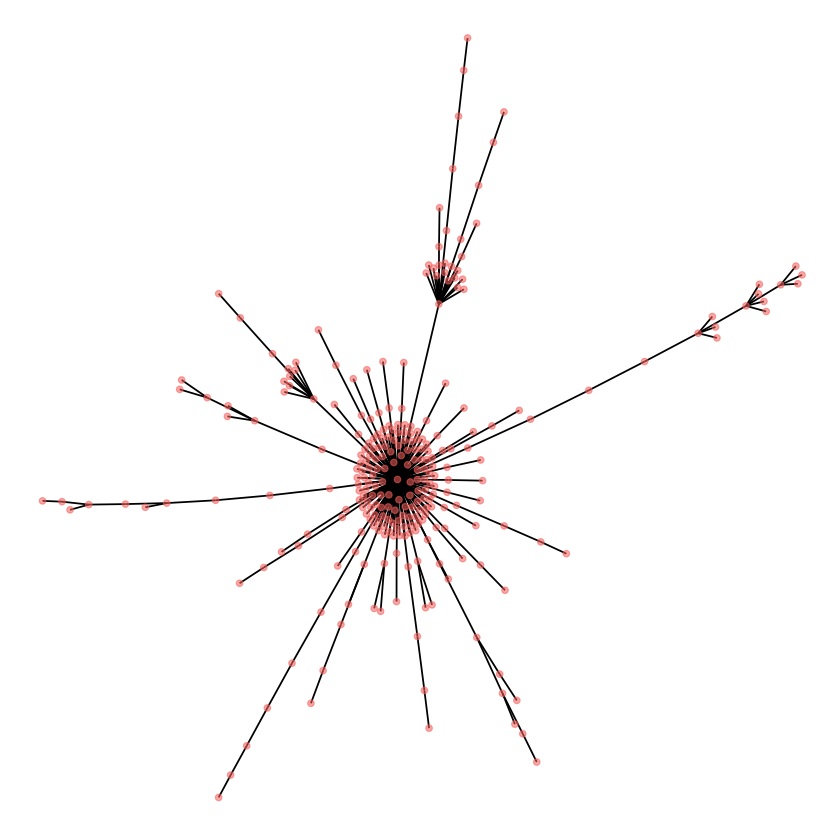

In [26]:
p

In [40]:
drop_pattern <- "https://t.co/[A-Za-z\\d]+|http://[A-Za-z\\d]+|&amp;|&lt;|&gt;|RT|https|ht"
unnest_pattern <- "([^A-Za-z_\\d#@']|'(?![A-Za-z_\\d#@]))"

words <- all_replies %>% 
  mutate(text = stringr::str_replace_all(text, drop_pattern, "")) %>%
  unnest_tokens(word, 
                text, 
                token = "regex", 
                pattern = unnest_pattern) %>%
  anti_join(stop_words)

Joining, by = "word"


In [41]:
agg <- words %>%
    group_by(word) %>%
    summarise(n = n()) %>%
    arrange(desc(n))

In [42]:
agg

word             n  
1   @beeonaposy      243
2   data              99
3   communication     22
4   sql               18
5   people            17
6   @timclicks        16
7   skills            15
8   @drob             14
9   @joelgrus         14
10  1                 14
11  @rctatman         13
12  business          13
13  underrated        13
14  knowing           11
15  question          11
16  ability           10
17  model             10
18  munging           10
19  understanding     10
20  cleaning           9
21  science            9
22  @visualisingdata   8
23  design             8
24  ethics             8
25  management         8
26  questions          8
27  rig                8
28  curiosity          7
29  job                7
30  scientist          7
⋮   ⋮                ⋮  
837 unnecessary      1  
838 unspoken         1  
839 uploading        1  
840 useable          1  
841 usefully         1  
842 vacuum           1  
843 values           1  
844 vec              1  
845 verbal           1  
846 verbally         1  
847 versions         1  
848 visual           1  
849 visualizations   1  
850 vote             1  
851 weekend          1  
852 weeks            1  
853 widest           1  
854 wild             1  
855 words            1  
856 workout          1  
857 world            1  
858 worthless        1  
859 wound            1  
860 wow              1  
861 write            1  
862 writers          1  
863 written          1  
864 yeah             1  
865 yeeeees          1  
866 yrs              1

In [ ]:
all_replies %>% 
  mutate(text = stringr::str_replace_all(text, drop_pattern, "")) %>%
  unnest_tokens(word, 
                text, 
                token = "regex", 
                pattern = unnest_pattern) %>%
  inner_join(get_sentiments("bing"), by = "word") %>%
  count(word, sentiment, sort = TRUE) %>%
  ungroup() %>%
  group_by(sentiment) %>%
  top_n(5) %>%
  ungroup() %>%
  mutate(word = reorder(word, n)) %>%
  ggplot(aes(word, n, fill = sentiment)) +
  geom_col(show.legend = FALSE) +
  facet_wrap(~sentiment, scales = "free_y") +
  labs(y = "Contribution to sentiment",
       x = NULL) +
  coord_flip()